In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
import os 
import imageio 
from IPython.display import Image
import pandas as pd
import csv

In [11]:
def calculate_reference_areas(xmin, xmax, ymin, ymax, i_max, s_values, num_runs):
    reference_areas = np.zeros((len(s_values), num_runs))
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")
        np.random.seed()
        for idx, s in enumerate(s_values):
            reference_s = s
            reference_i_max = i_max
            reference_area = 0.0
            for _ in range(reference_s):
                x = np.random.uniform(xmin, xmax)
                y = np.random.uniform(ymin, ymax)
                c = complex(x, y)
                z = c
                for _ in range(reference_i_max):
                    if abs(z) > 2.0:
                        break
                    z = z * z + c
                else:
                    reference_area += 1
            reference_area = (reference_area / reference_s) * (xmax - xmin) * (ymax - ymin)
            reference_areas[idx, run] = reference_area
            print(f"Reference Area for Run {run + 1}: {reference_area}, s: {s}")
    return reference_areas

def calculate_area_estimations(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, reference_areas):
    area_estimations_sum = np.zeros((i_max, len(s_values), num_runs))
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")
        np.random.seed()
        for idx, s in enumerate(s_values):
            for j in range(1, i_max + 1):
                AM = 0.0
                for _ in range(s):
                    x = np.random.uniform(xmin, xmax)
                    y = np.random.uniform(ymin, ymax)
                    c = complex(x, y)
                    z = c
                    for _ in range(j):
                        if abs(z) > 2.0:
                            break
                        z = z * z + c
                    else:
                        AM += 1
                AM = (AM / s) * (xmax - xmin) * (ymax - ymin)
                area_estimations_sum[j - 1, idx, run] = AM
    return area_estimations_sum

# Define the parameters
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
i_max = 200
s_values = [10, 500, 1000, 1500, 2000, 2500]
num_runs = 1

# Calculate reference areas
reference_areas = calculate_reference_areas(xmin, xmax, ymin, ymax, i_max, s_values, num_runs)
print(reference_areas)

# Calculate area estimations
area_estimations_sum = calculate_area_estimations(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, reference_areas)
print(area_estimations_sum)

# Calculate the reference area averages for each 's' value
reference_areas_avg = np.mean(reference_areas, axis=1)
print(reference_areas_avg)

Run 1/1
Reference Area for Run 1: 0.9000000000000001, s: 10
Reference Area for Run 1: 1.6560000000000001, s: 500
Reference Area for Run 1: 1.62, s: 1000
Reference Area for Run 1: 1.578, s: 1500
Reference Area for Run 1: 1.4805000000000001, s: 2000
Reference Area for Run 1: 1.5408, s: 2500
[[0.9   ]
 [1.656 ]
 [1.62  ]
 [1.578 ]
 [1.4805]
 [1.5408]]
Run 1/1
[[[9.    ]
  [8.334 ]
  [8.37  ]
  [8.364 ]
  [8.3925]
  [8.388 ]]

 [[3.6   ]
  [6.57  ]
  [6.471 ]
  [6.27  ]
  [6.2775]
  [6.1164]]

 [[0.9   ]
  [4.122 ]
  [4.131 ]
  [4.092 ]
  [4.1715]
  [4.1436]]

 ...

 [[0.    ]
  [1.62  ]
  [1.395 ]
  [1.536 ]
  [1.656 ]
  [1.4472]]

 [[0.    ]
  [1.674 ]
  [1.548 ]
  [1.644 ]
  [1.7235]
  [1.5372]]

 [[2.7   ]
  [1.728 ]
  [1.521 ]
  [1.746 ]
  [1.476 ]
  [1.4832]]]
[0.9    1.656  1.62   1.578  1.4805 1.5408]


[[9.     8.334  8.379  8.358  8.3925 8.442 ]
 [5.4    5.922  6.174  6.288  6.3    6.3108]
 [3.6    4.158  4.149  3.93   4.23   4.2192]
 ...
 [0.9    1.638  1.476  1.548  1.3995 1.4292]
 [3.6    1.368  1.575  1.572  1.584  1.4112]
 [0.9    1.53   1.359  1.506  1.6245 1.44  ]]


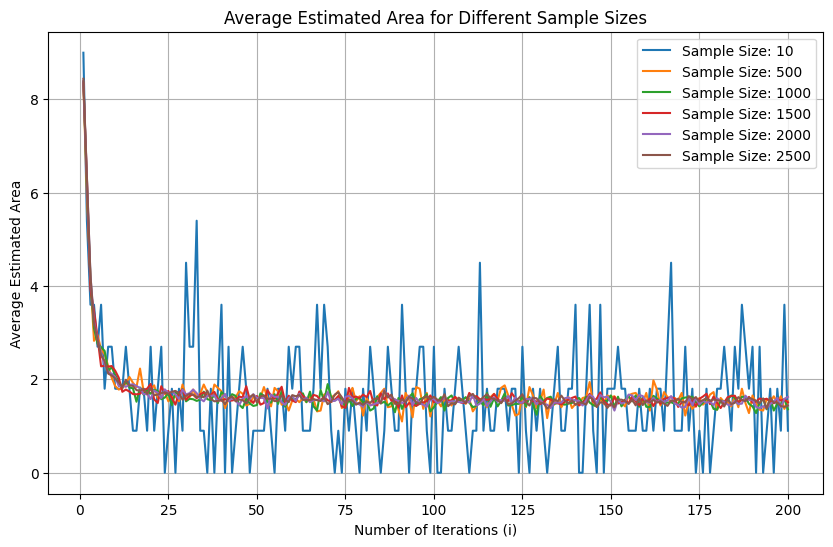

In [9]:
plt.figure(figsize=(10, 6))

# Calculate the average estimated area for each sample size
average_area_by_sample = np.mean(area_estimations_sum, axis=2)
print(average_area_by_sample)

# Plotting the estimated area for different sample sizes
for idx, s in enumerate(s_values):
    plt.plot(range(1, i_max + 1), average_area_by_sample[:, idx], label=f'Sample Size: {s}')

plt.xlabel('Number of Iterations (i)')
plt.ylabel('Average Estimated Area')
plt.title('Average Estimated Area for Different Sample Sizes')
plt.legend()
plt.grid()
plt.show()

[[[1.8   ]
  [1.458 ]
  [1.494 ]
  [1.482 ]
  [1.62  ]
  [1.5588]]]
[[[7.2000e+00]
  [6.8760e+00]
  [6.8850e+00]
  [6.8760e+00]
  [6.7725e+00]
  [6.8832e+00]]

 [[3.6000e+00]
  [4.4640e+00]
  [4.6800e+00]
  [4.8060e+00]
  [4.6800e+00]
  [4.7520e+00]]

 [[1.8000e+00]
  [2.7000e+00]
  [2.6550e+00]
  [2.4480e+00]
  [2.6100e+00]
  [2.6604e+00]]

 ...

 [[9.0000e-01]
  [1.8000e-01]
  [1.8000e-02]
  [6.6000e-02]
  [2.2050e-01]
  [1.2960e-01]]

 [[1.8000e+00]
  [9.0000e-02]
  [8.1000e-02]
  [9.0000e-02]
  [3.6000e-02]
  [1.4760e-01]]

 [[9.0000e-01]
  [7.2000e-02]
  [1.3500e-01]
  [2.4000e-02]
  [4.5000e-03]
  [1.1880e-01]]]


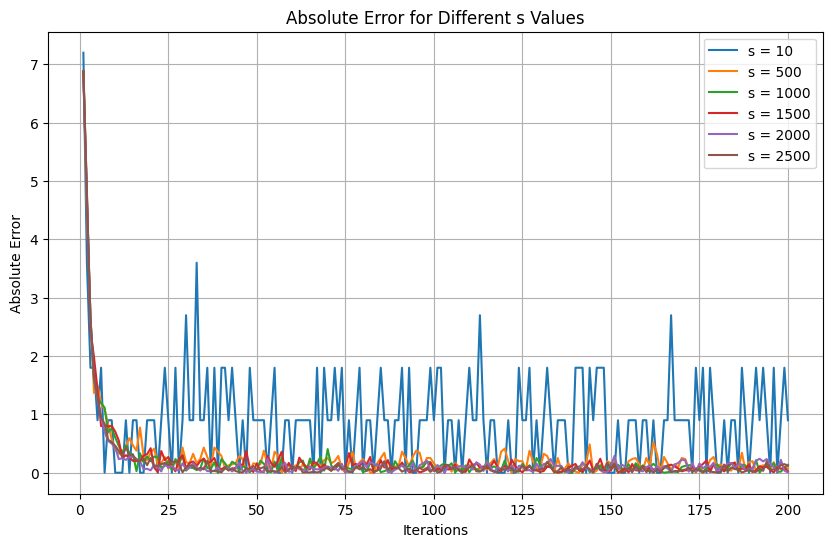

In [10]:
plt.figure(figsize=(10, 6))

# Reshape the reference_areas array
reshaped_reference_areas = reference_areas.reshape(1, len(s_values), num_runs)
print(reshaped_reference_areas)

# Calculate the absolute error based on s_values
absolute_errors = np.abs(area_estimations_sum - reshaped_reference_areas)
print(absolute_errors)

# Plot the absolute errors for different s_values
for i, s in enumerate(s_values):
    plt.plot(range(1, i_max + 1), absolute_errors[:, i, :].mean(axis=1), label=f's = {s}')

plt.xlabel('Iterations')
plt.ylabel('Absolute Error')
plt.title('Absolute Error for Different s Values')
plt.legend()
plt.grid()
plt.show()

# Implement for LHS